<a href="https://colab.research.google.com/github/LilZulf/Pneumonia-Chest-X-Ray-Classification-Multiclass-/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Chest X-Ray Classification (Multiclass)

This project aims to build a convolutional neural network (CNN) model to classify chest X-ray images into three categories:
- **Normal**
- **Viral Pneumonia**
- **Bacterial Pneumonia**

The classification is based purely on a custom CNN model without using any pretrained models (no transfer learning)

Dataset that used in this project contains :
- **Training**
  *   Normal : 1341 Images
  *   Viral : 1345 Images
  *   Bacterial : 2530 Images
- **Test**
  *   Normal : 234 Images
  *   Viral : 148 Images
  *   Bacterial : 242 Images
- **Validation**
  *   Normal : 8 Images
  *   Viral : 0 Images
  *   Bacterial : 8 Images

# Course of Action to Solve This Problem

To address this multiclass classification task, the following steps will be carried out:

1. **Dataset Preparation**
   - Mount Google Drive and load the dataset.
   - Ensure data is properly organized into `train/`, `val/`, and `test/` folders, each containing three subfolders: `NORMAL`, `VIRAL`, `BACTERIAL`.

2. **Data Preprocessing**
   - Resize all images to a uniform dimension (224x224).
   - Normalize image pixel values to the range [0, 1].
   - Apply real-time data augmentation (rotation, zoom, flipping) to improve generalization.

3. **Model Building**
   - Design a custom CNN architecture with Conv2D, MaxPooling, Dropout, and Dense layers.
   - Use `categorical_crossentropy` as the loss function and `Adam` as the optimizer.

4. **Model Training**
   - Train the CNN using the training set.
   - Evaluate performance on the validation set.

5. **Model Evaluation**
   - Test the trained model on an unseen test set.
   - Measure performance using accuracy, precision, recall, F1-score, and confusion matrix.

6. **Result Analysis**
   - Visualize training vs. validation accuracy and loss.
   - Identify signs of overfitting or underfitting.
   - Suggest improvements for future work.

1. Initial Library

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


2. Mount to google drive to access dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Image Preprocessing

In [ ]:
img_size = 224
batch_size = 32

train_dir = '/content/drive/MyDrive/dataset/chest_xray/train'
val_dir = '/content/drive/MyDrive/dataset/chest_xray/val'
test_dir = '/content/drive/MyDrive/dataset/chest_xray/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 5216 images belonging to 3 classes.
Found 16 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


4. Create Model With CNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

5. Train the model

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 1750s 11s/step - accuracy: 0.5037 - loss: 1.1696 - val_accuracy: 0.6250 - val_loss: 1.0834
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 694ms/step - accuracy: 0.6648 - loss: 0.7396 - val_accuracy: 0.8750 - val_loss: 0.6904
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 703ms/step - accuracy: 0.6890 - loss: 0.6998 - val_accuracy: 0.5625 - val_loss: 1.1487
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 692ms/step - accuracy: 0.7209 - loss: 0.6533 - val_accuracy: 0.5000 - val_loss: 1.0764
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 694ms/step - accuracy: 0.7191 - loss: 0.6535 - val_accuracy: 0.5000 - val_loss: 1.0011
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 698ms/step - accuracy: 0.7329 - loss: 0.6206 - val_accuracy: 0.5000 - val_loss: 1.2328
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 693ms/step - accuracy: 0.7474 - loss: 0.5977 - val_accuracy: 0.5000 - val_loss: 1.4484
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 702ms/step - accuracy: 0.7522 - 

7. Model Evaluation

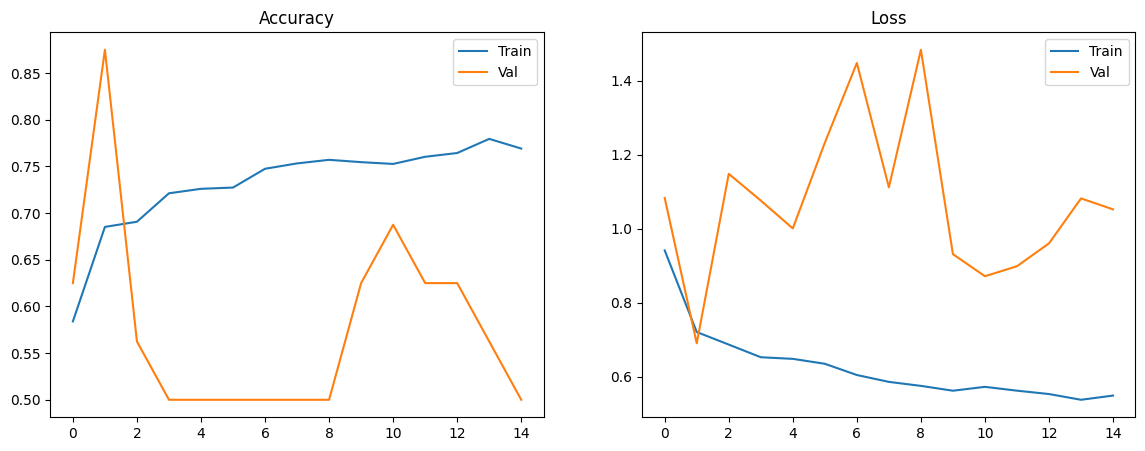

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()


624/624 ━━━━━━━━━━━━━━━━━━━━ 204s 324ms/step
              precision    recall  f1-score   support

    BACTERIA       0.74      0.97      0.84       242
      NORMAL       0.97      0.72      0.83       234
       VIRAL       0.76      0.69      0.72       148

    accuracy                           0.81       624
   macro avg       0.82      0.79      0.80       624
weighted avg       0.83      0.81      0.81       624



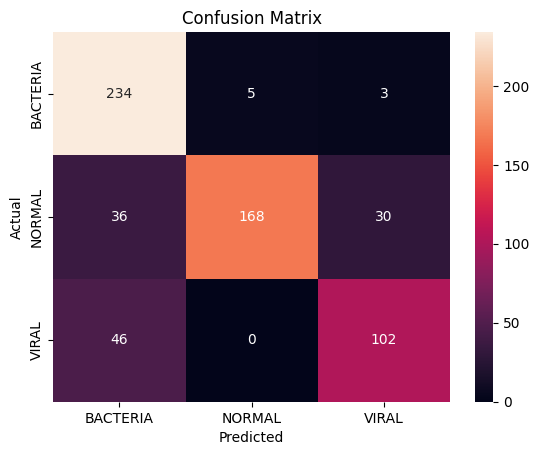

In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Conclusion

- The custom CNN model achieved **81% accuracy** on the test dataset.

- The **Bacterial** class showed a high recall, while the **Viral** class was relatively more difficult to classify accurately.

- **Overfitting** was clearly observed, as indicated by the steadily decreasing training loss and fluctuating validation loss.

- Suggested improvements for future development:

  - Increase the dataset size, especially for the **Viral** class.

  - Fine-tune a pretrained model to improve generalization.

  - Apply techniques such as **Early Stopping** and **data balancing**.

  - Test **Transfer Learning** (e.g., **MobileNetV2**) as an alternative approach.
